# Kode STL Untuk Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from itertools import product
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


## Upload Data dari Excel

In [2]:
data = pd.read_excel('book1.xlsx')

## Preparasi Data

In [3]:
vars = []
for i in data:
    vars.append(i)
vars.remove('Outlet')
vars.remove('Month')

In [4]:
j = 1
for i in vars:
    if j == 1:
        dataawal = data.drop(i, axis = 1)
        j = j + 1
    else:
        dataawal = dataawal.drop(i, axis = 1)

## Kode Untuk STL Berbentuk Def()

In [5]:
def stla(x,y):
    outlets= x['Outlet'].unique()
    dict_outlet = {}
    i = 0 
    for j in outlets:
        i += 1
        dict_outlet["outlet" + str(i)] = x[x.Outlet == outlets[i-1]]
    for i in dict_outlet:
        dict_outlet[i] = dict_outlet[i].drop('Outlet',axis = 1)
    salestotal = []
    for i in range(1,len(dict_outlet) + 1):
        salestotal.append(dict_outlet[str("outlet" + str(i))])
    for i in range(len(salestotal)):
        salestotal[i] = (salestotal[i]
         .assign(Date=lambda d: pd.to_datetime(d['Month']))
         .set_index('Date')
         .drop(columns='Month')
         )
           
    all_anomalies = pd.DataFrame()
    for i in range(len(salestotal)):
        stl = STL(salestotal[i])
        result = stl.fit()
        seasonal, trend, resid = result.seasonal, result.trend, result.resid
        estimated = trend + seasonal
        resid_mu = resid.mean()
        resid_dev = resid.std()
        lower = resid_mu - 3*resid_dev
        upper = resid_mu + 3*resid_dev
        anomalies = salestotal[i][(resid < lower) | (resid > upper)]
        if anomalies.empty == False:   #ada anomali di outlet tersebut
            anomalies['outlet'] = outlets[i]
            all_anomalies = pd.concat([all_anomalies,anomalies])
        estimated = trend + seasonal
        plt.figure(figsize=(12,4))
        plt.plot(resid)
        plt.fill_between([datetime(2003,1,1), datetime(2022,4,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
        plt.xlim(datetime(2003,9,1), datetime(2022,4,1))
        plt.title("Plot Untuk "+ str(vars[y]) + " Outlet : " + str(outlets[i]))
    print(all_anomalies)

## Kode Untuk Menjalankan STL Dengan Data yang ada

            Sales outlet
Date                    
2008-12-01    176      a
2009-12-01   1500      a
2010-12-01    110      a
2006-07-01    700      b
2011-03-01    206      c
2012-03-01    900      c
2007-08-01   1000      d
            Visitor outlet
Date                      
2004-08-01     1000      a
2005-08-01       23      a
2006-08-01       35      a
            Return outlet
Date                     
2013-12-01      30      b
Empty DataFrame
Columns: []
Index: []



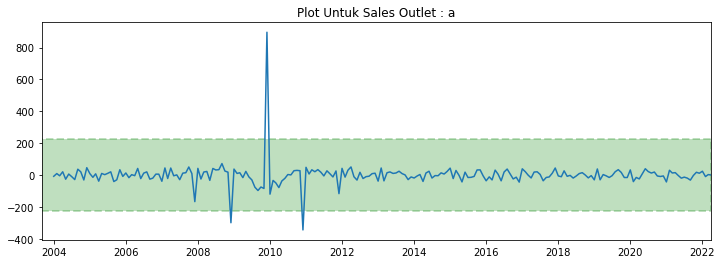

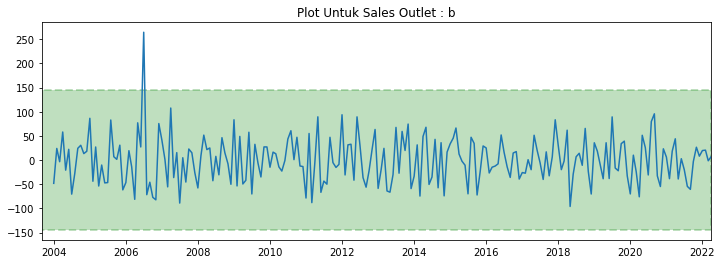

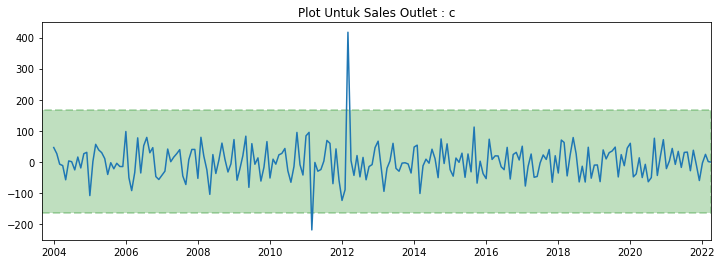

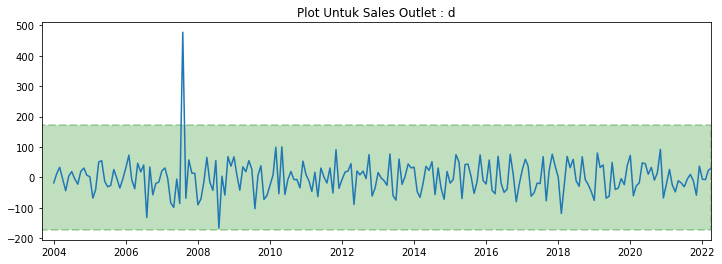

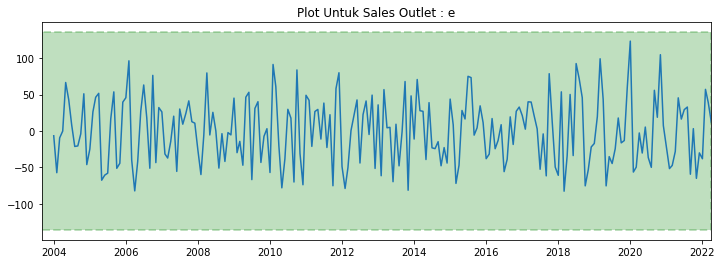

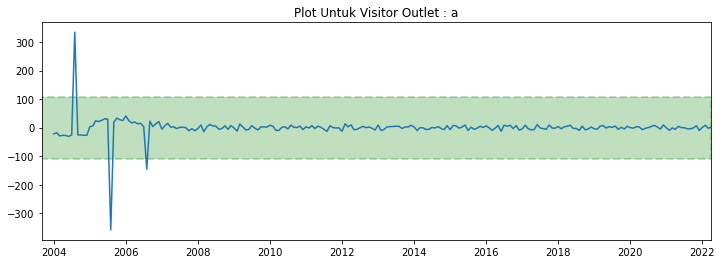

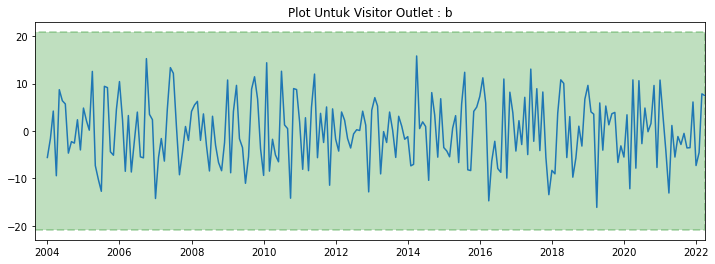

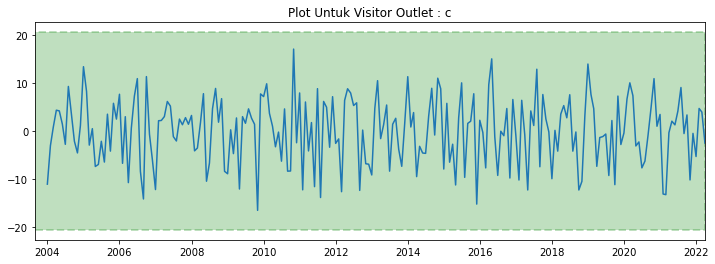

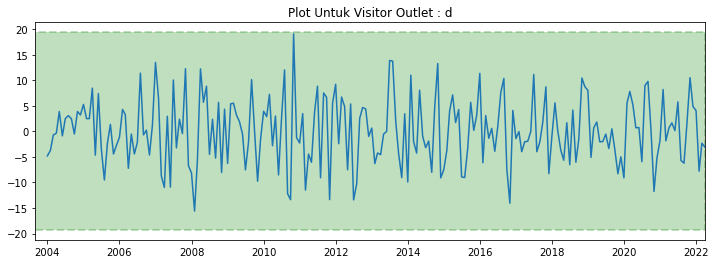

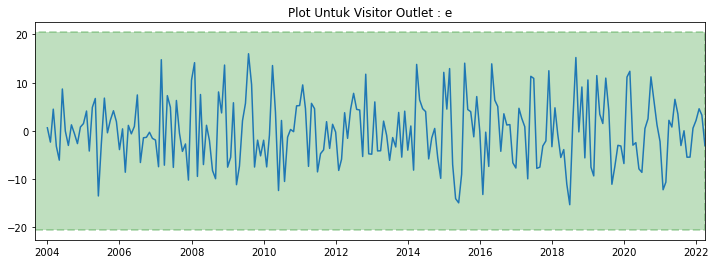

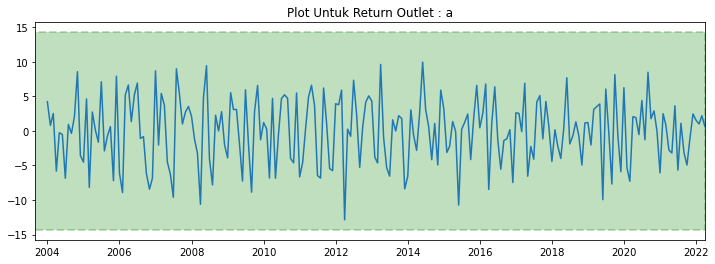

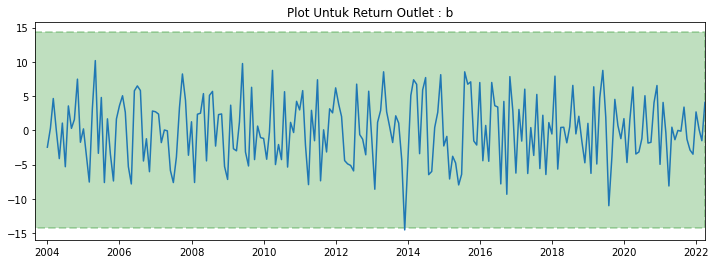

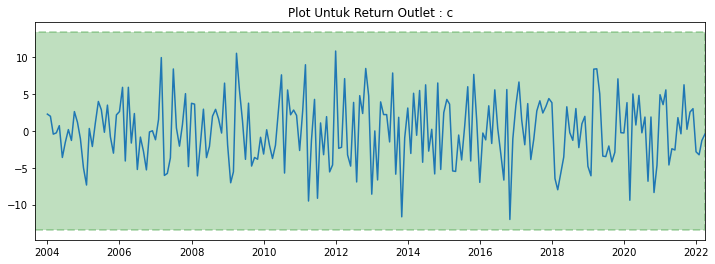

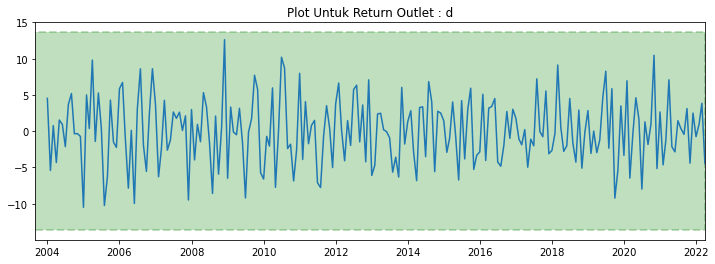

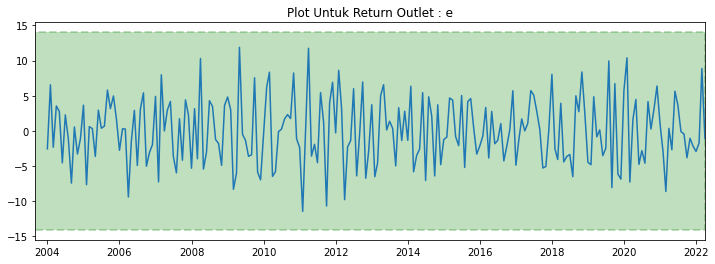

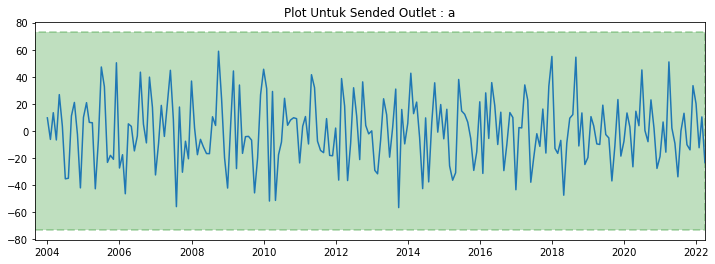

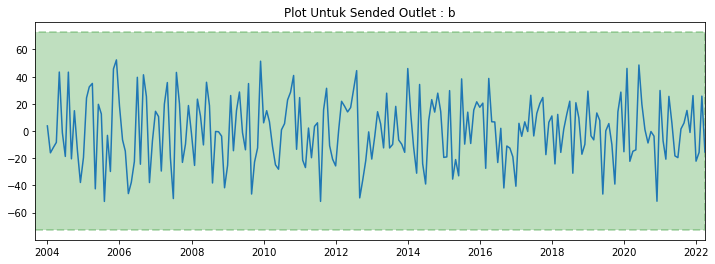

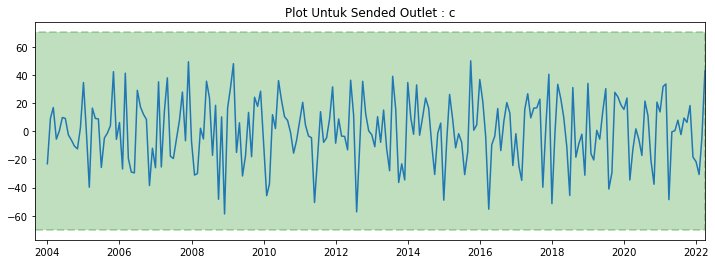

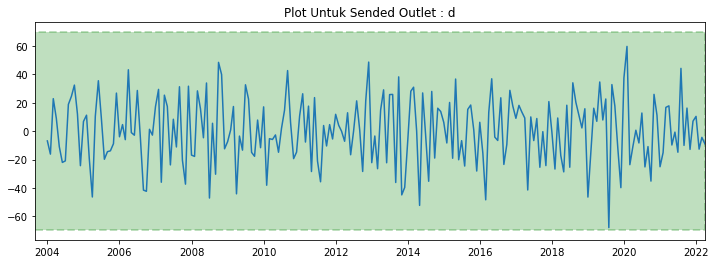

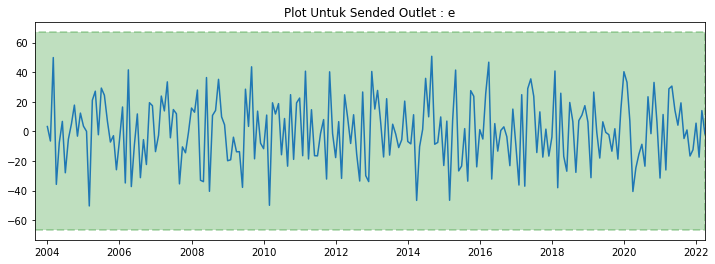

In [6]:
j = 0
for i in data:
    if i == 'Outlet' or i == 'Month':
        next
    else:
        dataawal[i] = data[i]
        stla(dataawal,j)
        j = j + 1
        dataawal.pop(i)
print()